<a href="https://colab.research.google.com/github/EdSang24/WEEK-2-CORE-IP/blob/main/WEEK_2_CORE_IP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Reading Data**

In [ ]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

In [ ]:
# loading our dataset

df=pd.read_csv('/content/Financial Dataset - 1.csv')
df.head()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [ ]:
# checking the data types for each column

df.dtypes

country                    object
year                        int64
uniqueid                   object
Has a Bank account         object
Type of Location           object
Cell Phone Access          object
household_size            float64
Respondent Age            float64
gender_of_respondent       object
The relathip with head     object
marital_status             object
Level of Educuation        object
Type of Job                object
dtype: object

**Checking the Data**

In [ ]:
# Determining the no. of records in our dataset

df.shape

(23524, 13)

In [ ]:
# Previewing the top of our dataset

df.head()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [ ]:
# Previewing the bottom of our dataset
 
df.tail()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
23519,Uganda,2018,uniqueid_2113,No,Rural,Yes,4.0,48.0,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,uniqueid_2114,No,Rural,Yes,2.0,27.0,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,uniqueid_2115,No,Rural,Yes,5.0,27.0,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,uniqueid_2116,No,Urban,Yes,7.0,30.0,Female,Parent,Divorced/Seperated,Secondary education,Self employed
23523,Uganda,2018,uniqueid_2117,No,Rural,Yes,10.0,20.0,Male,Child,Single/Never Married,Secondary education,No Income


**Tidying the Dataset**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


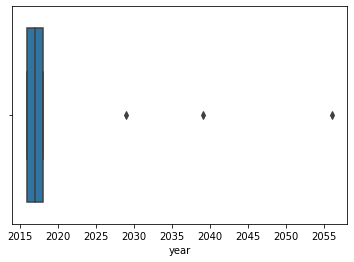

In [ ]:
# checking for outliers

sns.boxplot(df['year'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


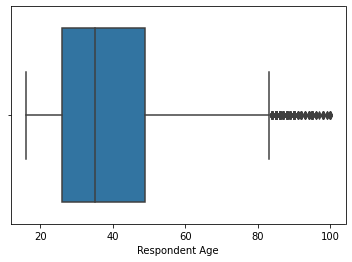

In [ ]:
sns.boxplot(df['Respondent Age'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


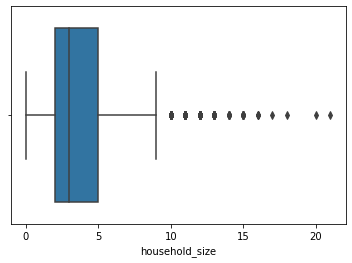

In [ ]:
sns.boxplot(df['household_size'])
plt.show()

In [ ]:
# checking for missing values
df.isnull().sum()

country                   14
year                       0
uniqueid                   0
Has a Bank account        36
Type of Location          15
Cell Phone Access         11
household_size            28
Respondent Age            34
gender_of_respondent      34
The relathip with head     4
marital_status            32
Level of Educuation       29
Type of Job               30
dtype: int64

In [ ]:
# dropping missing values
df = df.dropna()

In [ ]:
# fixing any typos on the column  names

df.rename(columns={'The relathip with head':'The relationship with the head','Level of Educuation':'Level of Education'}, inplace=True)
df.columns=df.columns.str.replace(' ','_').str.lower()

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
# checking for duplicates
df.duplicated().sum()

0

In [ ]:
# previewing cleaned dataset
df.head()

,country,year,uniqueid,has_a_bank_account,type_of_location,cell_phone_access,household_size,respondent_age,gender_of_respondent,the_relationship_with_the_head,marital_status,level_of_education,type_of_job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


**UNIVARIATE ANALYSIS**

Location with the highest access to bank accounts

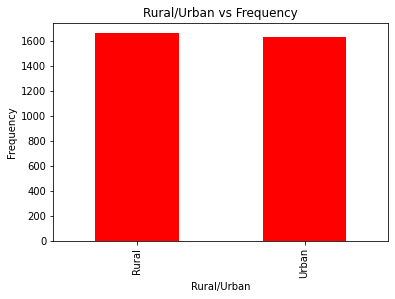

In [ ]:
Type_of_location=df[df['has_a_bank_account']=='Yes']
Type_of_location['type_of_location'].value_counts().plot.bar(color='Red')
plt.xlabel('Rural/Urban')
plt.ylabel('Frequency')
plt.title('Rural/Urban vs Frequency')
plt.show()

Country with highest access to bank accounts

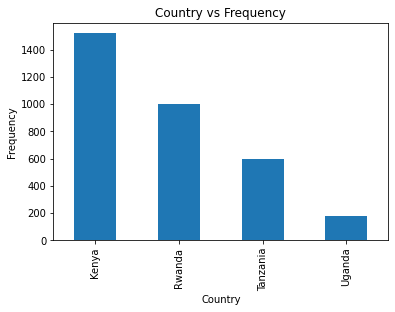

In [ ]:
df_country=df[df['has_a_bank_account']=='Yes']
df_country['country'].value_counts().plot.bar()
plt.xlabel('Country')
plt.ylabel('Frequency')
plt.title('Country vs Frequency')
plt.show()

Gender with highest access to banking

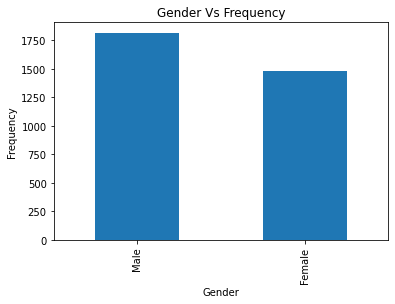

In [ ]:
Gender=df[df['has_a_bank_account']=='Yes']
Gender['gender_of_respondent'].value_counts().plot.bar()
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.title('Gender Vs Frequency')
plt.show()

Age with the highest acess to bank accounts

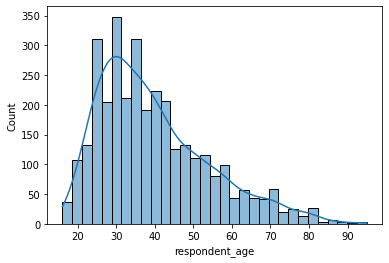

In [ ]:
age=df[df['has_a_bank_account']=='Yes']
sns.histplot(age['respondent_age'], palette='rocket', kde=True)

***Measures of central tendency***

In [ ]:
# mean age with bank accounts
df['respondent_age'].mean()

38.80550914621085

In [ ]:
# mode for age with bank accounts

age['respondent_age'].mode()

0    30.0
dtype: float64

In [ ]:
# median for age
age['respondent_age'].median()

36.0

In [ ]:
# mean for household without accounts
household=df[df['has_a_bank_account']=='No']
household['household_size'].mean()

3.7099670757258307

In [ ]:
# mode for housholds without accounts
household['household_size'].mode()

0    2.0
dtype: float64

In [ ]:
# median for households without accounts
household['household_size'].median()

3.0

***Measures of Dispersion***

In [ ]:
# variance for age
age['respondent_age'].var()

205.7552830095617

In [ ]:
# standard deviation of age
age['respondent_age'].std()

14.344172440735704

In [ ]:
# finding range for age
max_age=age['respondent_age'].max()
min_age=age['respondent_age'].min()
max_age-min_age

79.0

In [ ]:
# checking for skewness
age['respondent_age'].skew()

# the distribution is positively skewed

0.9357422832248766

In [ ]:
# checking for kurtosis
age['respondent_age'].kurt()

# the distribution is normal as the kurtosis is closer to zero

0.46628468620455177

In [ ]:
# summary statistics for age
age['respondent_age'].describe()

count    3297.000000
mean       39.605702
std        14.344172
min        16.000000
25%        29.000000
50%        36.000000
75%        48.000000
max        95.000000
Name: respondent_age, dtype: float64

**BIVARIATE ANALYSIS**

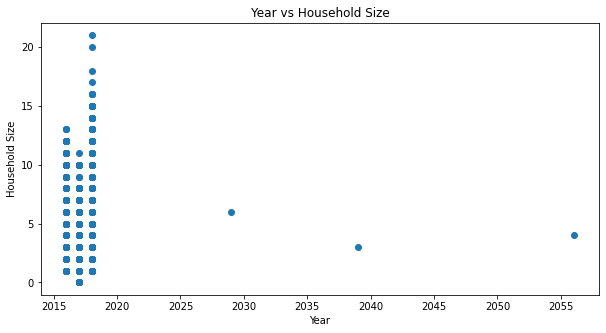

In [ ]:
# finding relation between year and household size
plt.figure(figsize=(10,5))
plt.scatter(df['year'], df['household_size'])
plt.xlabel('Year')
plt.ylabel('Household Size')
plt.title('Year vs Household Size')
plt.show()

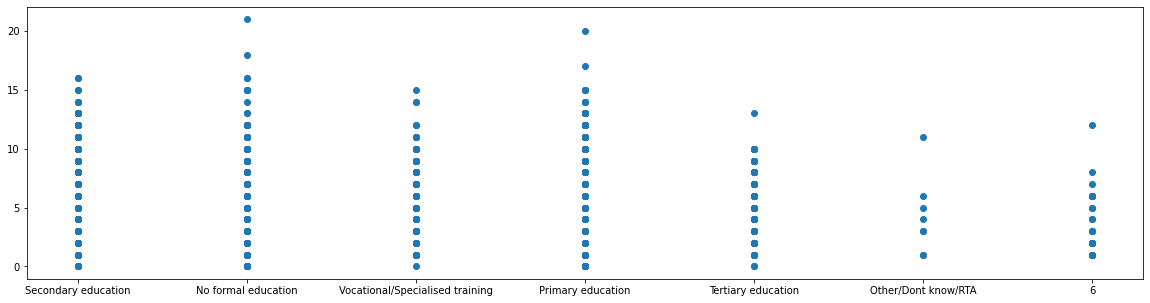

In [ ]:
# finding relation between individuals level of education and household size 
plt.figure(figsize=(20,5))
plt.scatter(df['level_of_education'],df['household_size'])

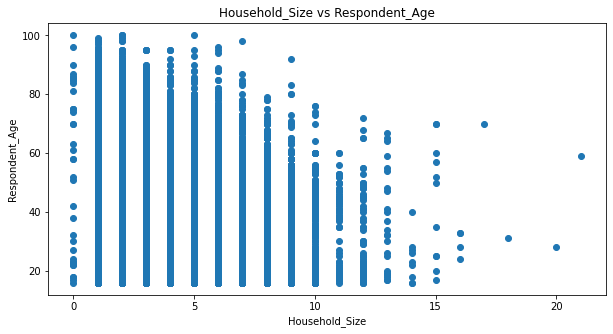

In [ ]:
# finding relation between age and household size
plt.figure(figsize=(10,5))
plt.scatter(df['household_size'], df['respondent_age'])
plt.xlabel('Household_Size')
plt.ylabel('Respondent_Age')
plt.title('Household_Size vs Respondent_Age')
plt.show()


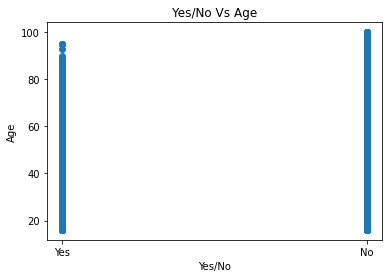

In [ ]:
# relation between individuals with accounts and age
plt.scatter(df['has_a_bank_account'], df['respondent_age'])
plt.xlabel('Yes/No')
plt.ylabel('Age')
plt.title('Yes/No Vs Age')
plt.show()

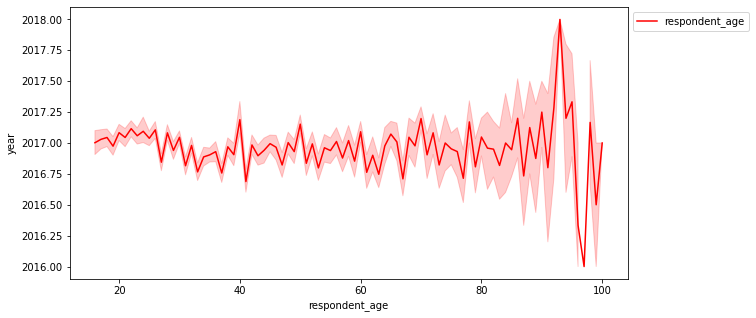

In [ ]:
# line graph of age over time
plt.figure(figsize=(10,5))
sns.lineplot(data=df, x='respondent_age', y='year', label='respondent_age', color='red')
plt.legend(bbox_to_anchor=(1,1))
plt.show()

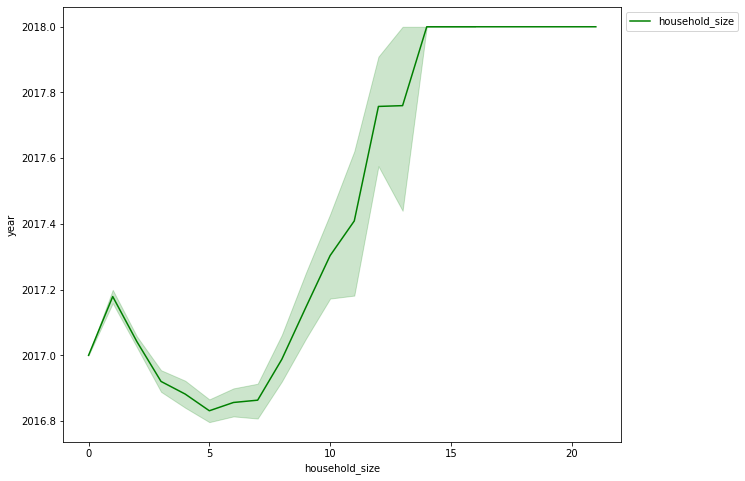

In [ ]:
# line graph of household size over time
plt.figure(figsize=(10,8))

sns.lineplot(data=df, x='household_size', y='year', label='household_size', color='Green')
plt.legend(bbox_to_anchor=(1,1))
plt.show()

In [ ]:
# pearsons coefficient of age and household size
coefficient=df['household_size'].corr(df['respondent_age'], method='pearson')
coefficient

# they have a weak correlation

-0.11970919507762415

In [ ]:
# pearsons coefficint of year and household size
coefficient2=df['year'].corr(df['household_size'], method='pearson')
coefficient2

# they have a weak correlation

-0.048901996192637645

In [ ]:
# pearsons coefficient of year and age
coefficient3=df['year'].corr(df['respondent_age'], method='pearson')
coefficient3

# they have a weak correlation

-0.0190618449776902

**MULTIVARIATE ANALYSIS**

In [ ]:
# Converting the 'has_a_bank_account' column to an integer
has_account= {'has_a_bank_account':{'No': 0, 'Yes':1}}
df.replace(has_account, inplace=True)
df.head()
df['has_a_bank_account']=df['has_a_bank_account'].astype(int)

In [ ]:
df.dtypes

country                            object
year                                int64
uniqueid                           object
has_a_bank_account                  int64
type_of_location                   object
cell_phone_access                  object
household_size                    float64
respondent_age                    float64
gender_of_respondent               object
the_relationship_with_the_head     object
marital_status                     object
level_of_education                 object
type_of_job                        object
dtype: object

In [ ]:
df1=df[['country','year','has_a_bank_account','household_size','respondent_age']]
df1.head()

,country,year,has_a_bank_account,household_size,respondent_age
0,Kenya,2018,1,3.0,24.0
1,Kenya,2018,0,5.0,70.0
2,Kenya,2018,1,5.0,26.0
3,Kenya,2018,0,5.0,34.0
4,Kenya,2018,0,8.0,26.0


In [ ]:
# dividing the set into feature set and corresponding labels
X = df1.drop('country', 1)
y = df1['country']

In [ ]:
# splitting the set into training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
# Normalizing our feature set
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
df1.dtypes

country                object
year                    int64
has_a_bank_account      int64
household_size        float64
respondent_age        float64
dtype: object

In [ ]:
# applying PCA and calling for fit then transforming the methods 
from sklearn.decomposition import PCA

pca = PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [ ]:
# returning variance caused by the principal components
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.28862015, 0.27152255, 0.22731244, 0.21254486])

In [ ]:
# training and making predictions using random forest classification
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' , accuracy_score(y_test, y_pred))

# the agorithm has an accuracry of 78.98%

[[ 995   38  180    0]
 [  15 1647  103    0]
 [ 117  131 1046    0]
 [ 356   15   26    0]]
Accuracy 0.7898907689012636


**FACTOR ANALYSIS**

In [ ]:
df1.head()

,country,year,has_a_bank_account,household_size,respondent_age
0,Kenya,2018,1,3.0,24.0
1,Kenya,2018,0,5.0,70.0
2,Kenya,2018,1,5.0,26.0
3,Kenya,2018,0,5.0,34.0
4,Kenya,2018,0,8.0,26.0


In [ ]:
# dropping columns
df1.drop(['country', 'year', 'has_a_bank_account'], axis=1, inplace=True)
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23343 entries, 0 to 23523
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   household_size  23343 non-null  float64
 1   respondent_age  23343 non-null  float64
dtypes: float64(2)
memory usage: 547.1 KB


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
# performing adequacy test 
# Installing factor analyzer 
# evaluating the factorability of our dataset
!pip install factor_analyzer==0.2.3

from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity

chi_square_value,p_value=calculate_bartlett_sphericity(df1)
chi_square_value, p_value

(336.89588119279915, 1.5175783636482101e-75)

In [ ]:
# Choosing the Number of Factors

from factor_analyzer.factor_analyzer import FactorAnalyzer

fa = FactorAnalyzer()
fa.analyze(df1,2 , rotation=None)

# Checking the Eigenvalues
ev, v = fa.get_eigenvalues()
ev

# only 1-factor eigenvalues is greater than one. 
# It means we need to choose only 1 factor (or unobserved variables).

,Original_Eigenvalues
0,1.119709
1,0.880291


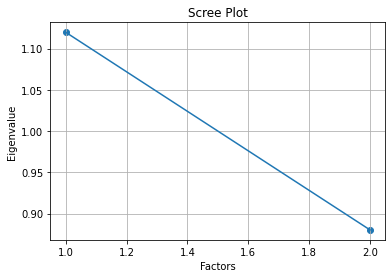

In [ ]:
# Creating a scree plot using matplotlib
plt.scatter(range(1,df1.shape[1]+1),ev)
plt.plot(range(1,df1.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

In [ ]:
# calculating factor analysis
fa = FactorAnalyzer()
fa.analyze(df1, 1, rotation="varimax")
fa.loadings

/usr/local/lib/python3.7/dist-packages/factor_analyzer/factor_analyzer.py:770: UserWarning: No rotation will be performed when the number of factors equals 1.
  warnings.warn('No rotation will be performed when '


,Factor1
household_size,-0.34599
respondent_age,0.34599


In [ ]:
# calculating variance factors
fa.get_factor_variance()

,Factor1
SS Loadings,0.239418
Proportion Var,0.119709
Cumulative Var,0.119709


**DISCRIMINANT ANALYSIS**

In [ ]:
df2=df[['country','has_a_bank_account','household_size','respondent_age']]
df2.head()

,country,has_a_bank_account,household_size,respondent_age
0,Kenya,1,3.0,24.0
1,Kenya,0,5.0,70.0
2,Kenya,1,5.0,26.0
3,Kenya,0,5.0,34.0
4,Kenya,0,8.0,26.0


In [ ]:
# dividing dataset
X = df2.iloc[:, 1:4].values
y = df2.iloc[:, 0].values

In [ ]:
# Divide the data into training and test sets
#

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
# feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
# performing LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=1)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

In [ ]:
# Evaluating the Performance of the algorithm
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' + str(accuracy_score(y_test, y_pred)))

# the LDA algorithm has an accuracy of 78.98%

[[ 995   38  180    0]
 [  15 1647  103    0]
 [ 117  131 1046    0]
 [ 356   15   26    0]]
Accuracy0.7898907689012636
